In [9]:
import pandas as pd
import os
src_path = os.getcwd()

In [14]:
housing_df = pd.read_csv(src_path+'/train.csv')
housing_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
#훈련 및 테스트용으로 데이터셋 분할
from sklearn.model_selection import train_test_split
training_df, test_df = train_test_split(housing_df, test_size=0.2)
training_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
287,288,0.03871,52.5,5.32,0,0.405,6.209,31.3,7.3172,6,293,16.6,396.90,7.14,23.2
476,477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
157,158,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
56,57,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
209,210,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0


In [21]:
#선형회귀기 구성
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
training_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
#선형회귀기를 구성하고 훈련 값 매트릭스와 레이블을 제공하여 모델을 학습
model = regression.fit(training_df[training_features], training_df['medv'])

In [23]:
#모델을 피팅한 후, 모델을 사용하여 테스트 데이터셋의 모든 행에 대해 예측을 얻을 수 있음
test_df['predicted_mdev'] = model.predict(test_df[training_features])
test_df.head()

<ipython-input-23-e24b78463109>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_mdev'] = model.predict(test_df[training_features])


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predicted_mdev
387,388,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4,3.350634
383,384,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56,12.3,10.813699
236,237,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,25.1,29.366657
176,177,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,25.117225
478,479,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6,17.276700


<AxesSubplot:xlabel='medv', ylabel='predicted_mdev'>

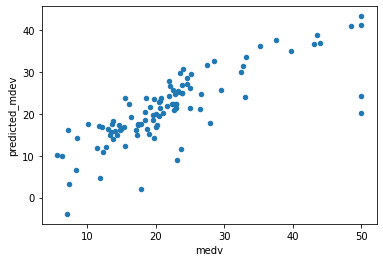

In [28]:
#예측 결과를 그래픽으로 확인
test_df[['medv', 'predicted_mdev']].plot(kind='scatter', x='medv', y='predicted_mdev')
#값이 주로 대각선상에 위치하는데, 완벽한 회귀분석기라면 대각선상에 모든 데이터 포인트들이 위치함

In [32]:
from sklearn.metrics import r2_score
r2_score(test_df['medv'], test_df['predicted_mdev'])
#좋은 R2 결정계수 : R2의 값이 0.65이상이면 쓸모있는 회귀식이 됨

0.6275927249876216